In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
metro_df = pd.read_csv('data-files/sub_2022.csv')

In [5]:
metro_df.head(3)

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20220101,3호선,수서,7370,7076
1,20220101,3호선,학여울,461,473
2,20220101,3호선,대청,3224,2903


In [12]:
metro_df.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수'], dtype='object')

In [10]:
# 구와 역 리스트 매핑
station_to_gu = {
    "강남구": ["삼성", "선릉", "역삼", "강남", "압구정", "신사", "매봉", "도곡", "대치", "학여울", "대청", "일원", "수서", "청담", "강남구청", "학동", "논현", "언주", "선정릉", "삼성중앙", "봉은사"],
    "강동구": ["천호", "강동", "길동", "굽은다리", "명일", "고덕", "상일동", "둔촌동", "강일", "암사", "천호", "강동구청", "둔촌오륜", "중앙보훈병원"],
    "강북구": ["수유", "미아", "미아사거리"],
    "강서구": ["방화", "개화산", "김포공항", "송정", "마곡", "발산", "우장산", "화곡", "까치산"],
    "관악구": ["낙성대", "서울대입구", "봉천", "신림"],
    "광진구": ["건대입구", "구의", "강변", "군자", "아차산", "광나루", "중곡", "군자", "어린이대공원", "건대입구", "뚝섬유원지"],
    "구로구": ["구로디지털단지", "대림", "신도림", "도림천", "남구로", "천왕", "온수"],
    "금천구": ["가산디지털단지"],
    "노원구": ["당고개", "상계", "노원", "석계", "태릉입구", "화랑대", "수락산", "마들", "노원", "중계", "하계", "공릉", "태릉입구"],
    "도봉구": ["창동", "쌍문", "도봉산"],
    "동대문구": ["신설동", "제기동", "청량리", "용두", "신설동", "장한평"],
    "동작구": ["사당", "신대방", "동작", "이수", "남성", "숭실대입구", "상도", "장승배기", "신대방삼거리", "보라매"],
    "마포구": ["합정", "홍대입구", "신촌", "이대", "아현", "마포", "공덕", "애오개", "월드컵경기장", "마포구청", "망원", "상수", "광흥창", "대흥"], 
    "서대문구": ["충정로", "홍제", "무악재", "독립문", "충정로"],
    "서초구": ["교대", "서초", "방배", "잠원", "고속터미널", "남부터미널", "양재", "남태령", "반포", "내방"],
    "성동구": ["상왕십리", "왕십리", "한양대", "뚝섬", "성수", "용답", "신답", "금호", "옥수", "신금호", "행당", "마장", "답십리"],
    "성북구": ["길음", "성신여대입구", "한성대입구", "보문", "안암", "고려대", "월곡", "상월곡", "돌곶이"],
    "송파구": ["잠실나루", "잠실", "잠실새내", "종합운동장", "가락시장", "경찰병원", "오금", "올림픽공원", "방이", "개롱", "거여", "마천", "몽촌토성",
             "석촌", "송파", "문정", "장지", "복정", "삼전", "석촌고분", "송파나루", "한성백제"],
    "양천구": ["양천구청", "신정네거리", "신정", "목동", "오목교"],
    "영등포구": ["문래", "영등포구청", "당산", "양평", "영등포시장", "신길", "여의도", "여의나루", "신풍"],
    "용산구": ["숙대입구", "삼각지", "신용산", "이촌", "효창공원앞", "녹사평", "이태원", "한강진"],
    "은평구": ["구파발", "연신내", "불광", "녹번", "응암", "역촌", "독바위", "구산", "새절", "증산", "디지털미디어시티"],
    "종로구": ["종각", "종로3가", "종로5가", "동대문", "동묘앞", "경복궁", "안국", "혜화", "서대문", "광화문", "창신"],
    "중구": ["서울", "시청", "을지로입구", "을지로3가", "을지로4가", "동대문역사문화공원", "신당", "충무로", "동대입구", "약수", "명동", "회현", "청구", "버티고개", "청구"],
    "중랑구": ["봉화산", "신내", "먹골", "중화", "상봉", "면목", "사가정", "용마산"]
}

In [13]:
def find_gu(staion_name):
    for gu, staions in station_to_gu.items():
        if staion_name in staions:
            return gu
    return '기타'

In [14]:
metro_df['구'] = metro_df['역명'].apply(find_gu)

In [16]:
result = metro_df.groupby('구')[['승차총승객수', '하차총승객수']].sum().reset_index()
result

,구,승차총승객수,하차총승객수
0,강남구,155533337,161209296
1,강동구,36564622,35098105
2,강북구,9001341,8758311
3,강서구,49045060,47238131
4,관악구,28063756,26917237
5,광진구,23353031,24126115
6,구로구,44684691,44709053
7,금천구,18287415,19121049
8,기타,1132464037,1119204827
9,노원구,52859796,52561239


In [17]:
result_1 = result[result['구']!='기타'].reset_index(drop=True)
result_2 = result_1.sort_values(by='승차총승객수',ascending=False)
result_3 = result_1.sort_values(by='하차총승객수',ascending=False)

In [25]:
print(result_2)
print(result_3)

       구     승차총승객수     하차총승객수
0    강남구  155533337  161209296
12   마포구   92408668   95613019
23    중구   78865473   80041581
22   종로구   77401702   77107471
17   송파구   68059455   67869979
19  영등포구   63630301   65213900
11   동작구   53971520   52755104
8    노원구   52859796   52561239
21   은평구   50654457   49226097
3    강서구   49045060   47238131
14   서초구   47283905   46994211
15   성동구   45692050   46627496
6    구로구   44684691   44709053
1    강동구   36564622   35098105
4    관악구   28063756   26917237
9    도봉구   23775519   23121580
5    광진구   23353031   24126115
20   용산구   20010296   20961486
7    금천구   18287415   19121049
10  동대문구   17992368   17833459
24   중랑구   17943368   17528052
16   성북구   12954299   12408837
18   양천구   10984661   11446598
13  서대문구    9466208    9288489
2    강북구    9001341    8758311
       구     승차총승객수     하차총승객수
0    강남구  155533337  161209296
12   마포구   92408668   95613019
23    중구   78865473   80041581
22   종로구   77401702   77107471
17   송파구   68059455   67869979
19  영등포구

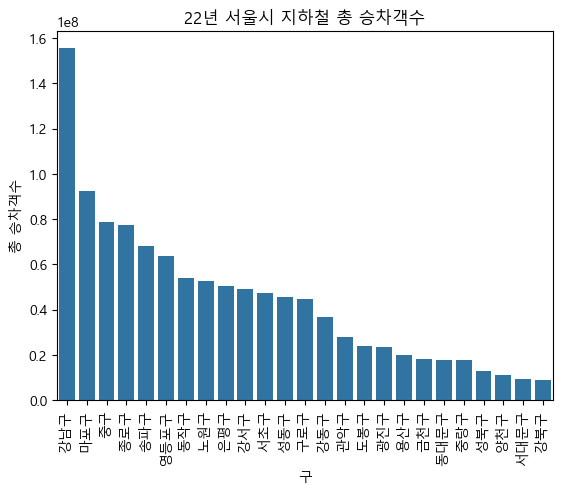

In [20]:
# # 한글 패치
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# # barplot
# sns.barplot( x = df['구'], y = df['총승차객수'])
sns.barplot( x = result_2['구'], y = result_2['승차총승객수'])
plt.xticks(rotation=90)
plt.title('22년 서울시 지하철 총 승차객수')
plt.xlabel('구')
plt.ylabel('총 승차객수')
plt.show()

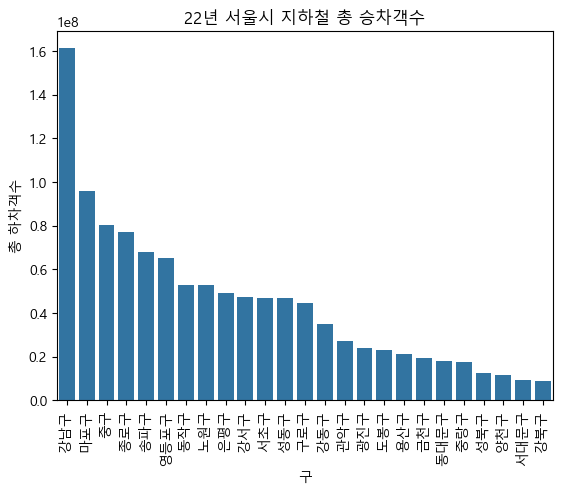

In [21]:
sns.barplot( x = result_3['구'], y = result_3['하차총승객수'])
plt.xticks(rotation=90)
plt.title('22년 서울시 지하철 총 승차객수')
plt.xlabel('구')
plt.ylabel('총 하차객수')
plt.show()